## Tarea 10 FIS-1344: AgustinIbarraS

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 

Resuelva el siguiente problema de valor inicial usando el método de Euler y los métodos de Taylor de orden 2 y 3

$$
y'(t) = \frac{\cos(t)}{\sin(y(t))}\,,\quad y(0) = 1\,,\quad 0 \leq t \leq 1
$$

Resuelva la ecuación analíticamente y grafique en función de $h$ el error cometido con los tres métodos para $t = 1$. ¿Es compatible con lo esperado? ¿Por qué?



-------------------------------------------------------------------------------------------------------------------------------

Primero definimos tenemos que la primera derivada va a ser igual a la función que nos dan. Con estos métodos necesitaremos la segunda y tercera derivada, por lo que las calculamos. Por último comparararemos con la solución exacta de la ecuación diferencial.

Exacta: $ y(t) = \cos^{-1}(\cos(1)-\sin(t)) $

Primera derivada: $ y'(t) = \frac{\cos(t)}{\sin(y(t))}\ $

Segunda derivada: $ y''(t) = \cos^{-1}(t)(\sin(t) + \cos(t)y'(t)\tan^{-1}(y)) $

Tercera derivada: $ y'''(t) = \sin^{-1}(y)(2\sin(t)y'(t)\tan^{-1}(y)-\cos(t)*y''(t)\tan^{-1}(y)+1)+\cos(t)y'(t)^{2}(\tan^{-2}(y)+\sin^{-2}(y))) $

In [28]:
def exacta(t):
    return np.arccos(np.cos(1)-np.sin(t))

def funcion(t, y):
    return (np.cos(t)/np.sin(y))

def dfuncion(t, y):
    return (np.sin(t) + np.cos(t)*funcion(t,y)*np.tan(y)**(-1))*np.cos(t)**(-1)

def d2funcion(t,y): 
    return np.sin(y)**(-1)*(2*np.sin(t)*funcion(t, y)*np.tan(y)**(-1)-np.cos(t)*(dfuncion(t, y)*np.tan(y)**(-1) + 1)+np.cos(t)*funcion(t,y)**(2)*(np.tan(y)**(-2)+np.sin(y)**(-2)))

Ahora definimos las funciones con las cuales haremos la ecuación diferencial, primero partimos con la de Euler vista en clases:

In [29]:
def euler(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w)
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

Ahora definimos la función con el método de Taylor, esto con orden 2 y 3.

In [30]:
def taylor2(f, df, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w) + h*h*df(t, w)/2 #Condicion para Taylor 2
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

In [31]:
def taylor3(f, df, d2f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w) + h*h*df(t, w)/2 + h*h*h*(d2f(t, w)/6) #Condicion para Taylor 3
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

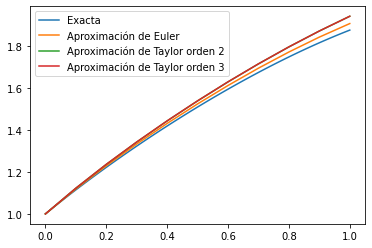

In [32]:
ts = np.linspace(0, 1, 100)
plt.plot(ts, exacta(ts), label='Exacta')
plt.plot(*euler(funcion, 0, 1, 1, 10), label='Aproximación de Euler')
plt.plot(*taylor2(funcion, dfuncion, 0, 1, 1, 10), label='Aproximación de Taylor orden 2')
plt.plot(*taylor3(funcion, dfuncion, d2funcion, 0, 1, 1, 10), label='Aproximación de Taylor orden 3')
plt.legend()

Como se puede ver las soluciones son muy parecidas a la exacta, pero aun así poseen un error, de hecho la de Euler le falta para llegar y a las de Taylor se pasan de la solución exacta.

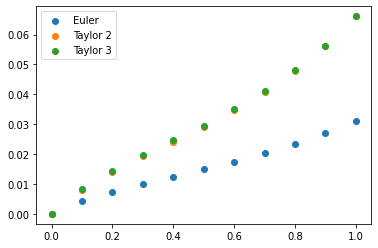

In [33]:
N = 10
ts, solucion_euler = euler(funcion, 0, 1, 1, N)
ts, solucion_taylor2 = taylor2(funcion, dfuncion, 0, 1, 1, N)
ts, solucion_taylor3 = taylor3(funcion, dfuncion, d2funcion, 0, 1, 1, N)
exacta = exacta(ts)
plt.scatter(ts, solucion_euler - exacta, label='Euler')
plt.scatter(ts, solucion_taylor2 - exacta, label='Taylor 2')
plt.scatter(ts, solucion_taylor3 - exacta, label='Taylor 3')
plt.legend()

Viendo el error en t=1, se puede ver que para Euler este es pequeño comparado con los métodos de Taylor 2 y 3, donde el error entre los dos es muy parecido. Para mí, esto no es compatible con lo que esperaba, esto dada que al menos, en la curva, se ve como el error en Taylor crece como exponencialmente, mientras que en Euler es casi lineal, esperaba que esto fuese al revés. Al final en Taylor estamos colocando más información para que sea más exacto, me sorprende que esté tan alejado a comparación de Euler.

# Calificacion: 6.6

El enunciado pide el error en funcion de $h$, no en funcion de $t$.